In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats 
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from scipy.stats import linregress
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter


# Set global font sizes - for manuscript
mpl.rcParams['font.size'] = 28
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['xtick.labelsize'] = 38
mpl.rcParams['ytick.labelsize'] = 38
mpl.rcParams['legend.fontsize'] = 34


In [3]:
# Load the statistics CSV file
combined_statistics_path = r"C:\Users\Feifei\Box\BR_remote_sensing\ebi_combined_statistics.csv"
df = pd.read_csv(combined_statistics_path)

# other File paths
root_dir = r'C:\Users\Feifei\Box\BR_remote_sensing\ebi_results'

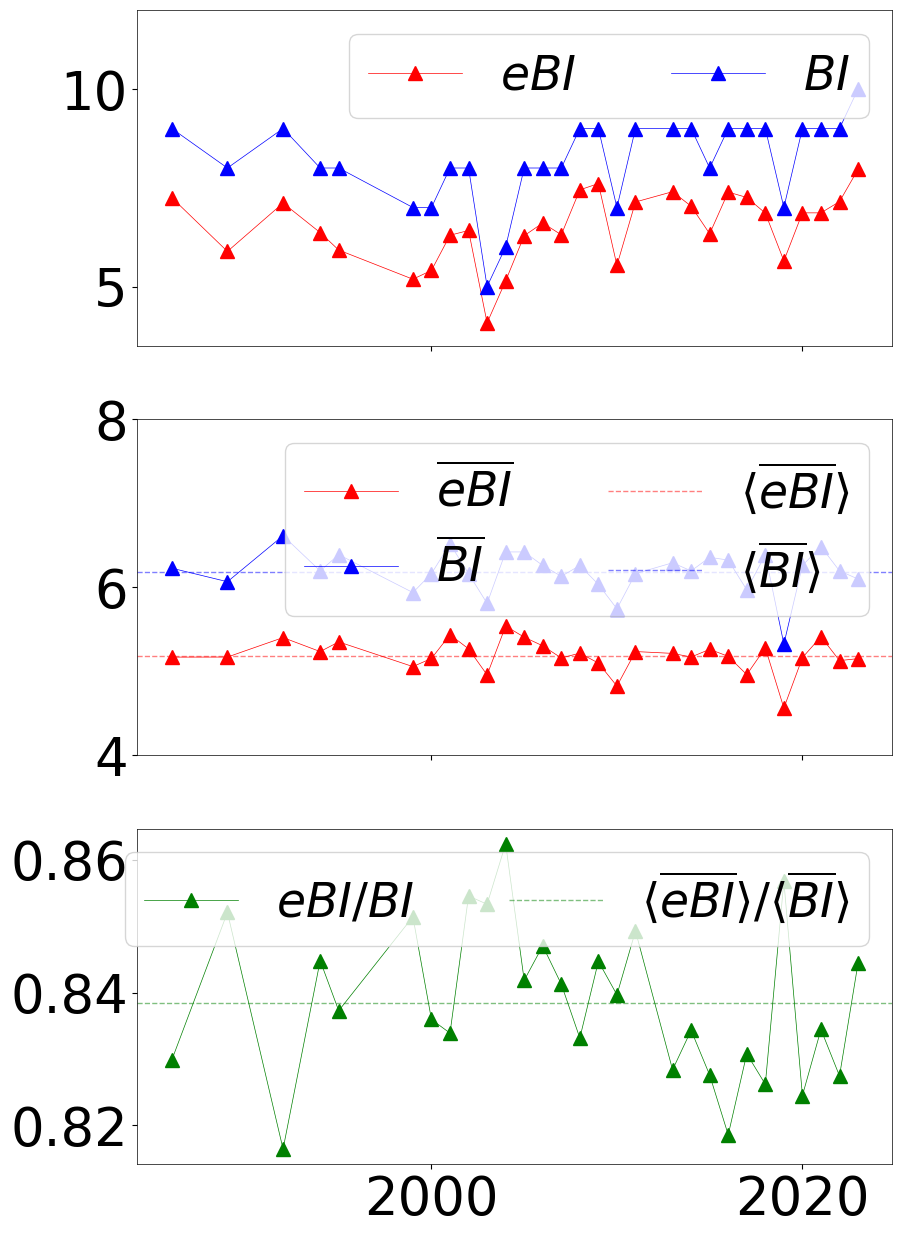

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specify the target river folder "Yukon_Eagle"
target_river = "Yukon_Eagle"
root_dir = r"C:\Users\Feifei\Box\BR_remote_sensing\ebi_results"
river_folder = os.path.join(root_dir, target_river)
rivgraph_path = os.path.join(river_folder, "rivgraph")

# Paths for the annual CSVs
ebi_csv = os.path.join(rivgraph_path, "eBI_results_annual.csv")
bi_csv  = os.path.join(rivgraph_path, "BI_results_annual.csv")

# Read and merge
ebi_df    = pd.read_csv(ebi_csv)
bi_df     = pd.read_csv(bi_csv)
merged_df = pd.merge(ebi_df, bi_df, on=["Year", "Cross_section"], how="inner")

# Clean Year
merged_df["Year"] = pd.to_numeric(merged_df["Year"], errors="coerce").astype("Int64")
merged_df = merged_df.dropna(subset=["Year"])
merged_df["Year"] = merged_df["Year"].astype(int)

# ————————————————
# Subplot 1: Cross‐section 10 (site‐level)
# ————————————————
df_target = merged_df[merged_df["Cross_section"] == 10].sort_values("Year")

# ————————————————
# Subplot 2 & 3: Reach‑level yearly means
# ————————————————
yearly_avg       = merged_df.groupby("Year").agg({"eBI": "mean", "BI": "mean"}).reset_index()
overall_ebi_avg  = yearly_avg["eBI"].mean()
overall_bi_avg   = yearly_avg["BI"].mean()
overall_ratio    = overall_ebi_avg / overall_bi_avg

# ————————————————
# Plotting on 3 subplots
# ————————————————
fig, axes = plt.subplots(3, 1, figsize=(10, 13), sharex=True)

ebi_color    = "red"
bi_color     = "blue"
ratio_color  = "green"
marker_style = "^"
marker_size  = 10

# Subplot 1: site‐level eBI & BI
axes[0].plot(df_target["Year"], df_target["eBI"],
             marker=marker_style, markersize=marker_size,
             color=ebi_color, linestyle='-', linewidth=0.5,
             label=r'$\mathit{eBI}$')
axes[0].plot(df_target["Year"], df_target["BI"],
             marker=marker_style, markersize=marker_size,
             color=bi_color, linestyle='-', linewidth=0.5,
             label=r'$\mathit{BI}$')
axes[0].legend(loc="upper right", ncol=2)
axes[0].tick_params(axis='both')
axes[0].grid(False)
axes[0].set_ylim(top=12, bottom=3.5)

# Subplot 2: reach‐level mean eBI & BI with their dashed averages
axes[1].plot(yearly_avg["Year"], yearly_avg["eBI"],
             marker=marker_style, markersize=marker_size,
             color=ebi_color, linestyle='-', linewidth=0.5,
             label=r'$\overline{\mathit{eBI}}$')
axes[1].plot(yearly_avg["Year"], yearly_avg["BI"],
             marker=marker_style, markersize=marker_size,
             color=bi_color, linestyle='-', linewidth=0.5,
             label=r'$\overline{\mathit{BI}}$')
axes[1].axhline(overall_ebi_avg,
                color=ebi_color, linestyle='--', alpha=0.5, linewidth=1,
                label=r'$\langle\overline{\mathit{eBI}}\rangle$')
axes[1].axhline(overall_bi_avg,
                color=bi_color, linestyle='--', alpha=0.5, linewidth=1,
                label=r'$\langle\overline{\mathit{BI}}\rangle$')
axes[1].legend(loc="upper right", ncol=2)
axes[1].tick_params(axis='both')
axes[1].grid(False)
axes[1].set_ylim(top=8, bottom=4)

# Subplot 3: time series of eBI/BI + mean ratio dashed line
ratio_ts = yearly_avg["eBI"] / yearly_avg["BI"]
axes[2].plot(yearly_avg["Year"], ratio_ts,
             marker=marker_style, markersize=marker_size,
             color=ratio_color, linestyle='-', linewidth=0.5,
             label=r'$\mathit{eBI}/\mathit{BI}$')
axes[2].axhline(overall_ratio,
                color=ratio_color, linestyle='--', alpha=0.5, linewidth=1,
                label=r'$\langle\overline{\mathit{eBI}}\rangle/\langle\overline{\mathit{BI}}\rangle$')
axes[2].legend(loc="upper right", ncol=2)
axes[2].tick_params(axis='both')
axes[2].grid(False)

# Thin spines & outward ticks on all panels
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
    ax.tick_params(axis='both', which='both', direction='out', bottom=True, left=True)

plt.tight_layout()
plt.show()

# Save (unchanged)
fig.savefig(
    r"C:\Users\Feifei\Box\BR_remote_sensing\figures\3_time_series_Irrawaddy.pdf",
    format='pdf', dpi=500, bbox_inches='tight', transparent=True
)



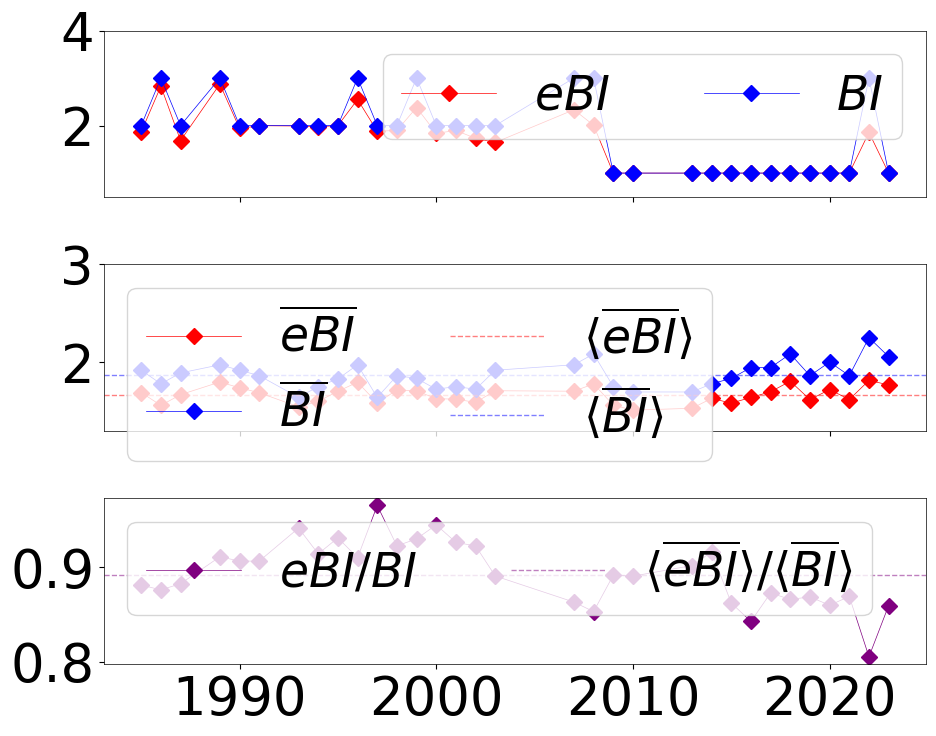

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specify the target river folder "Magdalena_Calamar"
target_river = "Magdalena_Calamar"
root_dir     = r"C:\Users\Feifei\Box\BR_remote_sensing\ebi_results"
river_folder = os.path.join(root_dir, target_river)
rivgraph_path= os.path.join(river_folder, "rivgraph")

# Paths for the annual CSVs
ebi_csv = os.path.join(rivgraph_path, "eBI_results_annual.csv")
bi_csv  = os.path.join(rivgraph_path, "BI_results_annual.csv")

# Read and merge
ebi_df    = pd.read_csv(ebi_csv)
bi_df     = pd.read_csv(bi_csv)
merged_df = pd.merge(ebi_df, bi_df, on=["Year", "Cross_section"], how="inner")

# Clean Year
merged_df["Year"] = pd.to_numeric(merged_df["Year"], errors="coerce")
merged_df = merged_df.dropna(subset=["Year"])
merged_df["Year"] = merged_df["Year"].astype(int)

# ————————————————
# Subplot 1: Cross‐section 8 (site‐level)
# ————————————————
df_target = merged_df[merged_df["Cross_section"] == 8].copy()
df_target.sort_values("Year", inplace=True)

# ————————————————
# Subplot 2 & 3: Reach‑level yearly means
# ————————————————
yearly_avg       = merged_df.groupby("Year").agg({"eBI": "mean", "BI": "mean"}).reset_index()
overall_ebi_avg  = yearly_avg["eBI"].mean()
overall_bi_avg   = yearly_avg["BI"].mean()
overall_ratio    = overall_ebi_avg / overall_bi_avg

# ————————————————
# Plotting on 3 subplots
# ————————————————
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ebi_color    = "red"
bi_color     = "blue"
ratio_color  = "purple"
marker_style = "D"   # diamond
marker_size  = 8
linw         = 0.5

# Subplot 1: site‐level eBI & BI
axes[0].plot(df_target["Year"], df_target["eBI"],
             marker=marker_style, markersize=marker_size,
             color=ebi_color, linestyle='-', linewidth=linw,
             label=r'$\mathit{eBI}$')
axes[0].plot(df_target["Year"], df_target["BI"],
             marker=marker_style, markersize=marker_size,
             color=bi_color, linestyle='-', linewidth=linw,
             label=r'$\mathit{BI}$')
axes[0].legend(loc="best", ncol=2)
axes[0].tick_params(axis='both')
axes[0].grid(False)
axes[0].set_ylim(top=4, bottom=0.5)

# Subplot 2: reach‐level mean eBI & BI with dashed averages
axes[1].plot(yearly_avg["Year"], yearly_avg["eBI"],
             marker=marker_style, markersize=marker_size,
             color=ebi_color, linestyle='-', linewidth=linw,
             label=r'$\overline{\mathit{eBI}}$')
axes[1].plot(yearly_avg["Year"], yearly_avg["BI"],
             marker=marker_style, markersize=marker_size,
             color=bi_color, linestyle='-', linewidth=linw,
             label=r'$\overline{\mathit{BI}}$')
axes[1].axhline(overall_ebi_avg,
                color=ebi_color, linestyle='--', linewidth=1, alpha=0.5,
                label=r'$\langle\overline{\mathit{eBI}}\rangle$')
axes[1].axhline(overall_bi_avg,
                color=bi_color, linestyle='--', linewidth=1, alpha=0.5,
                label=r'$\langle\overline{\mathit{BI}}\rangle$')
axes[1].legend(loc="upper left", ncol=2)
axes[1].tick_params(axis='both')
axes[1].grid(False)
axes[1].set_ylim(top=3, bottom=1.3)

# Subplot 3: time series of eBI/BI + mean ratio dashed line
ratio_ts = yearly_avg["eBI"] / yearly_avg["BI"]
axes[2].plot(yearly_avg["Year"], ratio_ts,
             marker=marker_style, markersize=marker_size,
             color=ratio_color, linestyle='-', linewidth=linw,
             label=r'$\mathit{eBI}/\mathit{BI}$')
axes[2].axhline(overall_ratio,
                color=ratio_color, linestyle='--', linewidth=1, alpha=0.5,
                label=r'$\langle\overline{\mathit{eBI}}\rangle/\langle\overline{\mathit{BI}}\rangle$')
axes[2].legend(loc="upper left", ncol=2)
axes[2].tick_params(axis='both')
axes[2].grid(False)

# Adjust spines and tick params on all panels
for ax in axes:
    ax.tick_params(axis='both', which='both', direction='out', bottom=True, left=True)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)

plt.tight_layout()
plt.show()


fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\3_time_series_magdalena.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)